In [2]:
import numpy as np
from tqdm import tqdm_notebook as tqdm

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from pyhive import hive
import getpass

HIVE_USER = 'pkrylov'
HIVE_PASS = 'SDFB456bW**ujas'
conn = hive.Connection(host="msk-hdp-nn04", port=10000, auth="LDAP", username=HIVE_USER, password=HIVE_PASS)

In [ ]:
col_all = [ 'paketnyy_trafik_lte_mb',                                                   
            'relative_rbu_used_dl',                           
            'pct_obryvov_paketnyh_soedineniy_lte_1' ,                                            
            'pct_obryvov_paketnyh_soedineniy_lte_2' ,                                             
            'srednyaya_skorost_na_odnogo_aktivnogo_polzovatelyaltevdlv_sote_mbitc_575',          
            'golosovoy_trafik_lte',                                                              
            'qpsk',                                                                          
            'dl_volume_retransmittedlte',                                                        
            'ul_volume_retransmittedlte']  

In [ ]:
import time
t0 =  time.time()

region = '52' #'77'
query = f"select * from pk_temp.pm_kpi4G_p where place_name_p like '{region}%'"
print (query)

with conn.cursor() as cur:
    cur.execute(query) 
    col_name = [x[0].split('.')[1] for x in cur.description]
    dff = pd.DataFrame(cur.fetchall(), columns=col_name)
    
dff.dropna(how='all', subset=col_all, inplace=True)   
dff.index=pd.to_datetime(dff.date_p,dayfirst=False)
del dff['date_p'] 
t1 =  time.time()

print ("Load {:.3f} s.".format(t1 - t0)  )   

In [ ]:
dff.to_pickle('dff_4G_2.pkl')

In [3]:
dff = pd.read_pickle('dff_4G_2.pkl')
dff.head()

,nri_id,place_name,gen,band,region,paketnyy_trafik_lte_mb,relative_rbu_used_dl,cell_availability_4g_calendar,pct_obryvov_paketnyh_soedineniy_lte_1,pct_obryvov_paketnyh_soedineniy_lte_2,...,lte_timing_advanced_index0_pct,lte_timing_advanced_index4_pct,lte_timing_advanced_index5_pct,lte_timing_advanced_index9_pct,lte_timing_advanced_index1_pct,lte_timing_advanced_index8_pct,lte_timing_advanced_index3_pct,lte_timing_advanced_index6_pct,lte_timing_advanced_index10_pct,place_name_p
date_p,,,,,,,,,,,,,,,,,,,,,
2019-04-30,9149366151913300262,52-2011,4G,1800,52,79621.321237,36.093750,100.000000,0.152162,0.167573,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52-20
2019-08-06,9148482050313560239,52-2058,4G,1800,52,96679.117672,44.460417,100.000000,0.172078,0.163855,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52-20
2020-02-05,9148968839713483900,52-2009,4G,1800,52,7141.401370,4.263542,100.000000,0.311884,0.254661,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52-20
2019-09-24,9148666948513853604,52-2093,4G,1800,52,48435.006618,24.912500,98.888889,0.094719,0.088390,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52-20
2019-09-16,9153840211013073453,52-2086,4G,1800,52,4186.531239,3.615625,100.000000,1.008161,1.017983,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52-20


In [4]:
len(dff)

2543494

In [5]:
dff.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2543494 entries, 2019-04-30 to 2019-04-14
Data columns (total 30 columns):
nri_id                                                                            int64
place_name                                                                        object
gen                                                                               object
band                                                                              int64
region                                                                            int64
paketnyy_trafik_lte_mb                                                            float64
relative_rbu_used_dl                                                              float64
cell_availability_4g_calendar                                                     float64
pct_obryvov_paketnyh_soedineniy_lte_1                                             float64
pct_obryvov_paketnyh_soedineniy_lte_2                                 

In [6]:
# ограничим до 2020 годом = теже цифры что в Traffic_prediction5.ipynb
dff_ = dff[:'2019-11-30']
len(dff_)

2135975

In [7]:
import gc

del dff
gc.collect()

8

In [8]:
place_name_list =  list(dff_.place_name.unique())
len(place_name_list)

960

In [9]:
#  'cell_availability_4g_calendar', 
col_all = [ 'paketnyy_trafik_lte_mb',                                                   
            'relative_rbu_used_dl',                          
            'srednyaya_skorost_na_odnogo_aktivnogo_polzovatelyaltevdlv_sote_mbitc_575']  

In [10]:
len(col_all)

3

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim
import torch.utils.data
import torch.utils.tensorboard as tensorboard
from torch.utils.data import Dataset, DataLoader,TensorDataset

print('Using torch version: ', torch.__version__)
torch.backends.cudnn.enabled = True

torch.manual_seed(0)
if torch.cuda.is_available(): torch.cuda.manual_seed(0)
    
import gc
import yaml

Using torch version:  1.1.0


In [12]:
def seed_everything(seed):
    torch.manual_seed(seed)
    np.random.seed(seed)
    
seed_everything(seed=42)

In [13]:
dict_agg_4g =  {'paketnyy_trafik_lte_mb': 'sum', 
                'relative_rbu_used_dl' : 'sum',      
                'srednyaya_skorost_na_odnogo_aktivnogo_polzovatelyaltevdlv_sote_mbitc_575': 'mean'}

In [14]:
def get_data_placename(dff, place_name, dict_agg):
    #t0 =  time.time()    
    dff_ = dff.query(f"place_name =='{place_name}'") 
    
    # собираем сводную таблицу в разрезе 'date_p', 'band'
    nri_id_list = list (dff_['nri_id'].unique())  
    df_list = []    
    for nri_id_ in nri_id_list:
        
        df = dff_[dff_['nri_id']== nri_id_][['nri_id', 'band'] + col_all].copy()
        df.fillna(method='ffill', inplace=True)
        df.fillna(method='bfill', inplace=True)
        df_list.append(df)
    
    df = pd.concat(df_list)
    df.fillna(0, inplace=True)
    
    if df.isnull().sum().sum() != 0:
        print(f"{place_name} place_name !=0")
        
    df = df.groupby(['date_p', 'band']).agg(dict_agg)
    
    df.reset_index(inplace=True)
    df.index=pd.to_datetime(df.date_p,dayfirst=True)
    del df['date_p']
    
    df_list = []            
    for nri_id in nri_id_list:   
        
        df_ = dff_[dff_['nri_id']== nri_id][col_all]
        df_.sort_index(inplace=True)
        df_.fillna(method='ffill', inplace=True)
        df_.fillna(method='bfill', inplace=True)    
        
        #for band_ in [800, 1800, 2600]:  
        df_list.append(df_)

    #t1 =  time.time()
    #print ("Load {:.3f} s.".format(t1 - t0)  )
    return df_list 

In [15]:
# сколько отдельных nri_id все nri_id в рамках одного placename обобщаются на одну модель
df_list = get_data_placename(dff_, '52-6201', dict_agg_4g)
len(df_list)

6

In [16]:
df_list[0].head()

,paketnyy_trafik_lte_mb,relative_rbu_used_dl,srednyaya_skorost_na_odnogo_aktivnogo_polzovatelyaltevdlv_sote_mbitc_575
date_p,,,
2017-07-05,5704.714100,11.378261,16.379448
2017-07-06,5704.714100,16.900000,16.379448
2017-09-27,18006.187824,25.162500,15.302636
2017-11-21,18006.187824,25.162500,15.302636
2017-11-22,18006.187824,25.162500,15.302636


In [17]:
df_list[0].shape

(714, 3)

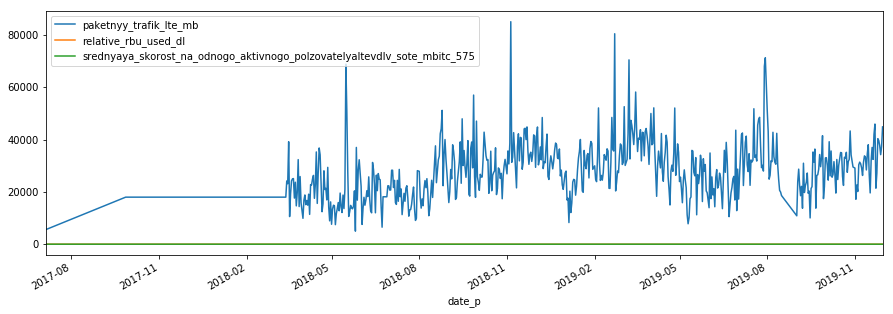

In [18]:
df_list[0].plot(figsize =(15,5));

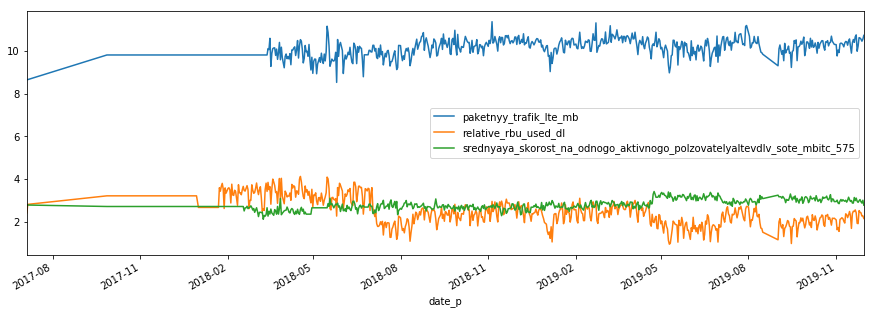

In [19]:
np.log(df_list[0]).plot(figsize =(15,5));

In [20]:
df_list[0].shape

(714, 3)

In [21]:
from typing import Tuple

def split_sequence(sequence: np.array, history: int) -> Tuple[np.array, np.array]:
    """
    sequence: sequence with one channel
    history : history window for train (batch size)
    """
    xs = []
    ys = []
    
    for i in range(len(sequence)):        
        end_ix = i + history
        if end_ix > len(sequence) - 1:
            break
        
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        xs.append(seq_x)
        ys.append(seq_y)
    
    return np.array(xs), np.array(ys)

In [22]:
# https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

def normalize(df, min_dict, max_dict):
    result = df.copy()
    for feature_name in df.columns:        
        min_value = min_dict[feature_name]
        max_value = max_dict[feature_name]
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        result.fillna(0, inplace=True)
    return result

In [23]:
def get_numpy_data(df_list, place_name, device):
    # соберем данные для обучения для всего place_name
    tr_x, tr_y, va_x, va_y = [],[],[],[]
    tr_x1_, tr_y1_, va_x1_, va_y1_ = [],[],[],[]

    df_stats = pd.concat(df_list).describe()
    min_dict = df_stats.iloc[3, :].to_dict()
    max_dict = df_stats.iloc[7, :].to_dict()
    
#     f  = open(f'min_max_dict/MIN_{place_name}.yaml', 'w')
#     yaml.dump(min_dict, f)
#     f.close()
#     f  = open(f'min_max_dict/MAX_{place_name}.yaml', 'w')
#     yaml.dump(max_dict, f)
#     f.close()    

    for df_ in df_list:
        df_ = normalize(df_, min_dict, max_dict)
        #print (df_.isnull().sum().sum())

        duration = df_.shape[0]
        row_ind =  int(duration * prop_split //1)  

        train_set = df_.iloc[:row_ind, :]
        valid_set = df_.iloc[row_ind:, :]
        #print(train_set.shape, train_set.shape)

        tr_x2_, tr_y2_, va_x2_, va_y2_ = [],[],[],[]
        
        for col in df_.columns:
            tr_x_ch, tr_y_ch = split_sequence(train_set[col].values, history=WINDOW)
            va_x_ch, va_y_ch = split_sequence(valid_set[col].values, history=WINDOW)
            #print(tr_x_ch.shape, va_x_ch.shape)

            if va_x_ch.shape[0] !=0 and  tr_x_ch.shape[0] !=0:
                tr_x2_.append(tr_x_ch)
                tr_y2_.append(tr_y_ch)
                va_x2_.append(va_x_ch)
                va_y2_.append(va_y_ch)            


        #print("shape df_")            
        try:  
            tr_x2 = np.stack(tr_x2_, axis=1)
            tr_y2 = np.stack(tr_y2_, axis=1)
            #print(tr_x.shape, tr_y.shape)

            va_x2 = np.stack(va_x2_, axis=1) 
            va_y2 = np.stack(va_y2_, axis=1) 
            #print(va_x2.shape, va_y2.shape)
            
            #print("-"*30)   
            tr_x1_.append(tr_x2)
            tr_y1_.append(tr_y2)
            va_x1_.append(va_x2)
            va_y1_.append(va_y2)   
            #break 

        except:
            #print('exception p.stack')
            pass      

    #print("shape final")
    try: 
        tr_x = np.vstack(tr_x1_)
        tr_y = np.vstack(tr_y1_)
        #print(tr_x.shape, tr_y.shape)

        va_x = np.vstack(va_x1_) 
        va_y = np.vstack(va_y1_) 
        #print(va_x.shape, va_y.shape)
    except:
        tr_x, tr_y, va_x, va_y = [],[],[],[]
    
    tr_x = torch.tensor(tr_x).to(device, dtype=torch.float, non_blocking=True)
    tr_y = torch.tensor(tr_y).to(device, dtype=torch.float, non_blocking=True) 
    va_x = torch.tensor(va_x).to(device, dtype=torch.float, non_blocking=True)
    va_y = torch.tensor(va_y).to(device, dtype=torch.float, non_blocking=True) 
    
    return [tr_x, tr_y, va_x, va_y, min_dict, max_dict]

In [24]:
class CustomTensorDataset(Dataset):
    """TensorDataset with support of transforms.
    """
    def __init__(self, tensors, transform=None):
        assert all(tensors[0].size(0) == tensor.size(0) for tensor in tensors)
        self.tensors = tensors
        self.transform = transform

    def __getitem__(self, index):
        x = self.tensors[0][index]

        if self.transform:
            x = self.transform(x)

        y = self.tensors[1][index]

        return x, y

    def __len__(self):
        return self.tensors[0].size(0)

In [25]:
def wavg(arr, weights):
    """
    arr     : torch.tensor with size [batch_size, num_channels]
    weights : torch.tensor with size [num_channels]
    """
    weighted_mean = torch.mean(
        torch.div(
            torch.sum(torch.mul(arr, weights), dim=1).float(), torch.sum(weights).float()
        )
    )
    return weighted_mean

In [26]:
import torch.nn.functional as F

class CNN_ForecastNet(nn.Module):
    
    def __init__(self, n_feat, output, device, keep_prob=0.9, debug=True):
        super(CNN_ForecastNet, self).__init__()
        
        self.n_feat = n_feat 
        self.device = device
        self.keep_prob = keep_prob
        self.output = output 
        
        # self.output*4 1+ band_ in [800, 1800, 2600]
        self.conv1 = nn.Conv1d(in_channels=self.output*1, out_channels=32, kernel_size=7, stride=1)
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=16, kernel_size=7, stride=1)
        self.conv3 = nn.Conv1d(in_channels=16, out_channels=8,  kernel_size=4, stride=1)
        self.conv4 = nn.Conv1d(in_channels=8,  out_channels=8,  kernel_size=4, stride=1)
        # коичество признаков иди нас колько назад мы смотрим чтобы учить 
        self.fc1 = nn.Linear(in_features=(self.n_feat-18)*8, out_features=32) # (n_feat-(kernel_size-1))*out_channels
        self.fc2 = nn.Linear(in_features=32, out_features = self.output*1)
        
        self.initialize_weights(debug=debug)                
        
    def forward(self, x):
        
        out = F.relu(self.conv1(x))
        out = F.relu(self.conv2(out))
        out = F.relu(self.conv3(out))
        out = F.relu(self.conv4(out))
        
        out = out.reshape(out.size(0), -1)
       #out = F.dropout(out, p=1-self.keep_prob, training=self.training)
        out = F.relu(self.fc1(out))
        out = self.fc2(out)   
        return out
    
        
    def initialize_weights(self, debug):
        """
        Orthogonal initialization for weights and zero initialization for biases.
        """
        learnable_named_parameters = [(name, p) for name, p in self.named_parameters() if p.requires_grad]
        
        for name, p in learnable_named_parameters:
            if 'weig' in name:
                nn.init.orthogonal_(p, nn.init.calculate_gain('relu'))
                if debug:
                    print('{: <20} : initialized w parameter with orthogonal weights'.format(name), flush=True)
            if 'bias' in name:
                nn.init.constant_(p, 0.01)
                if debug:
                    print('{: <20} : initialized b parameter with constant weights'.format(name), flush=True)
           
        
    def loss_fn(self, x_pred, x):
        """
        Calculates loss function.
        """ 
        weights_list = [0.5]+[(1-0.5)/(self.output*1-1)]*(self.output*1-1)
        #weights_list = [0.8, 0.1, 0.1]
        
        arr = torch.pow(torch.sub(x_pred, x), 2)
        loss = wavg(arr, weights=torch.tensor(weights_list, device=self.device))  
        return loss
    
    
    def regularization_loss_fn(self, lam=1e-5, alp=0.5):
        """
        Calculates loss with regularization.
        
        lam: regularization coefficient
        alp: elastic net balance (btw l1 and l2)
        """
        def l1_penalty(v):
            return torch.sum(torch.abs(v))

        def l2_penalty(v):
            return torch.sum(v**2)

        params = [  # only weight parameters should be regularized (not biases)
                    self.conv1.weight,
                    self.conv2.weight,
                    self.conv3.weight,
                    self.conv4.weight,
                    self.fc1.weight,
                    self.fc2.weight]
        
        # add l1 and l2 (elastic net regularization)
        loss = lam * sum(alp*l1_penalty(p) + (1-alp)*l2_penalty(p) for p in params)
        return loss

In [27]:
class EarlyStopping:
    """
    Early stopping to prevent from overfitting.
    """
    def __init__(self, patience=5):
        
        self.patience = patience
        self.counter = 0
        
        self.best_loss = np.inf
        self.best_epoch = 1
        self.best_net = None

        
    def estimate_learning_progress(self, curr_epoch, curr_loss, net):
        """Estimates learning progress."""
        stop_iteration = False
        
        # Check learning improvement
        if curr_loss < self.best_loss:
            self.best_loss = curr_loss
            self.best_epoch = curr_epoch
            self.best_net = net
            # update counter
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                stop_iteration = True
            
        #self._get_learning_info(curr_epoch=curr_epoch, curr_loss=curr_loss)
        return stop_iteration
    
    
    def _get_learning_info(self, curr_epoch, curr_loss):
        report_str = 'Early stopping info (validation): patience cntr {}, best_epoch={}, best_loss={:.4f}, curr_epoch={}, curr_loss={:.4f}'
        report_str = report_str.format(self.counter, 
                                       self.best_epoch, 
                                       self.best_loss*100, 
                                       curr_epoch, 
                                       curr_loss*100)

        return print(report_str)

In [85]:
def training_data(train_loader, valid_loader, device, place_name):

    t0 =  time.time()

    # just for visualization
    loss_tr_mean_lst = []
    loss_va_mean_lst = []

    stop_iteration_flag = True
    #epochs = 250

    net = CNN_ForecastNet(n_feat=WINDOW, output=len(col_all), device=device, debug=False).to(device, non_blocking=True)
    # patience
    es = EarlyStopping(patience = 10)

    optimizer = torch.optim.Adam(net.parameters(), lr=1e-5)
    criterion = nn.MSELoss(reduction='mean')

    for epoch in range(epochs):
        #print("{} epochs {}/{}".format(place_name, epoch+1, epochs))

        # ~~ TRAIN ~~ #
        tr_running_loss = 0.0
        net.train()   
        loss_tr_lst = []


        for i, (batch_x, batch_y) in enumerate(train_loader):
            #batch_x = batch_x.to(device)
            #batch_y = batch_y.to(device)

            optimizer.zero_grad()

            # forward
            tr_preds = net(batch_x)
            # Calculate loss
            tr_loss = net.loss_fn(tr_preds, batch_y)
            # Calculate regularization loss
            regularization_loss = net.regularization_loss_fn(lam=1e-5, alp=0.1)
            # Calculate total regularization loss
            total_loss = tr_loss + regularization_loss

            # backward + optimizer
            total_loss.backward()
            optimizer.step()

            # calc loss
            loss_tr_lst.append(tr_loss.item())        
            #print(f'Epoch: {epoch+1}/{epochs}, Step: {i+1:>2}/{len(train_loader)}, Loss: {tr_loss.item():.3f}')

        loss_tr_mean = np.mean(np.array(loss_tr_lst))
        loss_tr_mean_lst.append(loss_tr_mean)

        # ~~ VAL ~~ #    
        va_running_loss = 0.0    
        net.eval()    
        loss_va_lst = []

        with torch.no_grad():
            for batch_x_val, batch_y_val in valid_loader:
                #batch_x_val = batch_x_val.to(device)
                #batch_y_val = batch_y_val.to(device)

                va_preds = net(batch_x_val)
                va_loss = criterion(va_preds, batch_y_val)

                loss_va_lst.append(va_loss.item())

        loss_va_mean = np.mean(loss_va_lst)
        loss_va_mean_lst.append(loss_va_mean)    
        
        #print(f'valid_loss {loss_va_mean*100}')

        stop_iteration = es.estimate_learning_progress(curr_epoch=epoch+1, curr_loss=loss_va_mean, net=net)
        if stop_iteration:
            best_net = es.best_net
            torch.save(best_net.state_dict(), f'4G_store_weiths/{place_name}.pth')
            stop_iteration_flag = False
            break   

    #writer.close()
    if stop_iteration_flag != False:
        torch.save(net.state_dict(), f'4G_store_weiths/{place_name}.pth')

    #print('Finished training!', flush=True)
    #del net
    #torch.cuda.empty_cache()    
    gc.collect()
    
    t1 =  time.time()

    #print ("Load {:.3f} s.".format(t1 - t0)  )
    #return [loss_tr_mean_lst, loss_va_mean_lst]
    return epoch

In [29]:
def write_min_max(place_name, min_dict, max_dict):   
    f  = open(f'4G_min_max_dict/MIN_{place_name}.yaml', 'w')
    yaml.dump(min_dict, f)
    f.close()
    f  = open(f'4G_min_max_dict/MAX_{place_name}.yaml', 'w')
    yaml.dump(max_dict, f)
    f.close()   

In [86]:
import time

prop_split = 0.80
WINDOW = 100 
BATCH_SIZE = 32
NUM_WORKERS = 0 # 8
epochs = 100

def create_pipeline(place_name):
    t0 = time.time() 
    
    cuda = 2 # np.random.randint(2)
    device = torch.device(f"cuda:{cuda}" if torch.cuda.is_available() else "cpu")
    
    df_list = get_data_placename(dff_, place_name, dict_agg_4g)
    tr_x, tr_y, va_x, va_y, min_dict, max_dict = get_numpy_data(df_list, place_name, device)   
 
    if len(tr_x) != 0:        
        write_min_max(place_name, min_dict, max_dict)
            
#         train = TrafficDataset(X=tr_x, y=tr_y)
#         valid = TrafficDataset(X=va_x, y=va_y)  

        train = CustomTensorDataset(tensors=(tr_x, tr_y), transform=None)
        valid = CustomTensorDataset(tensors=(va_x, va_y), transform=None)        
        train_loader = torch.utils.data.DataLoader(train, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)
        valid_loader = torch.utils.data.DataLoader(valid, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

        #print(train.X.shape, train.y.shape)
        epochs_trained = training_data(train_loader, valid_loader, device, place_name)

        t1 = time.time()    
        print("Finished training {:.3f} s. ready place_name {} epochs {}".format(t1 - t0, place_name, epochs_trained))  
         
    else:
        print("Place_name {} skipped".format(place_name))
        
    gc.collect()

In [87]:
place_name = '52-2001'

cuda = 2 # np.random.randint(2)
device = torch.device(f"cuda:{cuda}" if torch.cuda.is_available() else "cpu")
    
tr_x, tr_y,_ , _, _, _  = get_numpy_data(get_data_placename(dff_, place_name,dict_agg_4g), place_name, device)
print(tr_x.shape, tr_y.shape)

torch.cuda.empty_cache() 

torch.Size([5796, 3, 100]) torch.Size([5796, 3])


In [88]:
create_pipeline('52-2001')

Finished training 105.873 s. ready place_name 52-2001 epochs 99


In [83]:
# inference
place_name = '52-2001'

cuda = 2 # np.random.randint(2)
device = torch.device(f"cuda:{cuda}" if torch.cuda.is_available() else "cpu")
    
df_list = get_data_placename(dff_, place_name, dict_agg_4g)
tr_x, tr_y, va_x, va_y, _, _ = get_numpy_data(df_list, place_name, device)   

if len(tr_x) != 0:        

    valid = CustomTensorDataset(tensors=(va_x, va_y), transform=None)     
    valid_loader = torch.utils.data.DataLoader(valid, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

PATH = f'/home/pkrylov/CNN_baseline/4G_store_weiths/{place_name}.pth'
net = CNN_ForecastNet(n_feat=WINDOW, output=len(col_all), device=device, debug=False).to(device, non_blocking=True)   
net.load_state_dict(torch.load(PATH, map_location = device )) #['state_dict']
net.eval()    

va_preds_all_batches = []

with torch.no_grad():
    for batch_x_val, batch_y_val in valid_loader:

        va_preds = net(batch_x_val)
        va_preds_all_batches.append(va_preds.cpu().data.numpy())

te_preds = np.vstack(va_preds_all_batches)

sum((te_preds[:,0] - va_y.cpu().data.numpy()[:,0])**2)/len(te_preds[:,0])

0.0027371446244083193

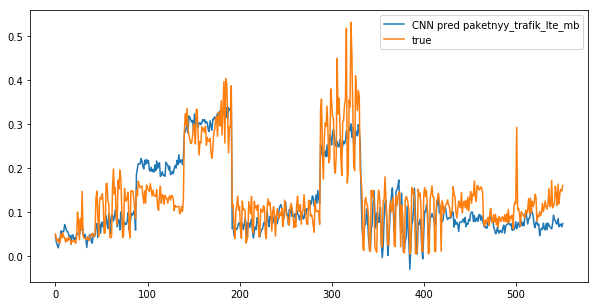

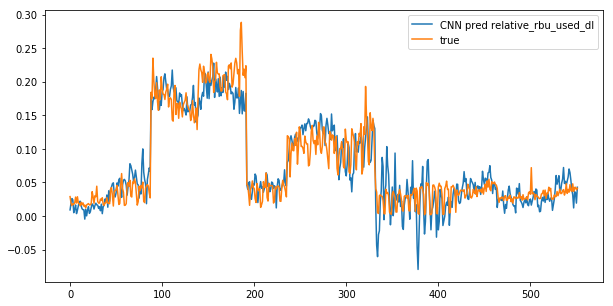

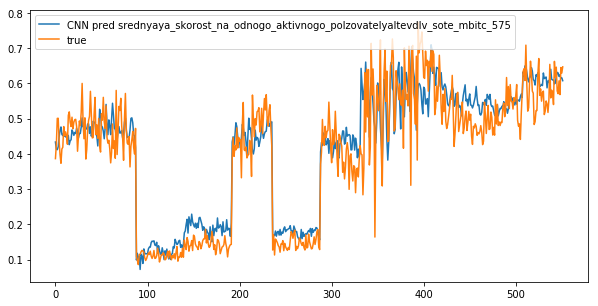

In [84]:
for i in range(len(col_all)):

    plt.figure(figsize=(10,5))
    plt.plot(te_preds[:,i], label=f'CNN pred {col_all[i]}')
    plt.plot(va_y.cpu().data.numpy()[:,i], label='true')
    plt.legend();

In [46]:
len(place_name_list)

960

In [ ]:
from tqdm import tqdm_notebook as tqdm
import time

prop_split = 0.80
WINDOW = 100 
BATCH_SIZE = 32
NUM_WORKERS = 0 # 8
epochs = 100

for place_name in tqdm (place_name_list):
    create_pipeline(place_name)

Finished training 51.416 s. ready place_name 52-2011 epochs 99
Finished training 51.639 s. ready place_name 52-2058 epochs 99
Finished training 53.498 s. ready place_name 52-2093 epochs 99
Finished training 29.424 s. ready place_name 52-2086 epochs 99
Place_name 52-2071 skipped
Finished training 31.856 s. ready place_name 52-2077 epochs 58
Finished training 29.748 s. ready place_name 52-2042 epochs 99
Finished training 43.613 s. ready place_name 52-2025 epochs 84
Finished training 47.841 s. ready place_name 52-2029 epochs 99
Finished training 57.314 s. ready place_name 52-2095 epochs 99
Finished training 4.916 s. ready place_name 52-2043 epochs 18
Finished training 7.280 s. ready place_name 52-2084 epochs 25
Finished training 15.284 s. ready place_name 52-2034 epochs 50
Finished training 50.111 s. ready place_name 52-2002 epochs 99
Finished training 72.276 s. ready place_name 52-2053 epochs 99
Finished training 3.228 s. ready place_name 52-2044 epochs 12
Finished training 18.714 s. rea

Finished training 51.624 s. ready place_name 52-2133 epochs 99
Finished training 79.956 s. ready place_name 52-2123 epochs 99
Place_name 52-2193 skipped
Finished training 11.491 s. ready place_name 52-2184 epochs 41
Finished training 27.141 s. ready place_name 52-2164 epochs 99
Place_name 52-2113 skipped
Place_name 52-2142 skipped
Place_name 52-2182 skipped
Place_name 52-2114 skipped
Place_name 52-2117 skipped
Place_name 52-2134 skipped
Place_name 52-2288 skipped
Finished training 75.950 s. ready place_name 52-2294 epochs 99
Finished training 52.610 s. ready place_name 52-2273 epochs 99
Finished training 5.230 s. ready place_name 52-2220 epochs 19
Finished training 24.873 s. ready place_name 52-2279 epochs 99
Finished training 50.870 s. ready place_name 52-2274 epochs 99
Finished training 7.082 s. ready place_name 52-2296 epochs 25
Finished training 7.886 s. ready place_name 52-2257 epochs 30
Place_name 52-2201 skipped
Finished training 58.661 s. ready place_name 52-2293 epochs 99
Fini

Finished training 24.706 s. ready place_name 52-2499 epochs 99
Finished training 6.544 s. ready place_name 52-2450 epochs 21
Finished training 26.894 s. ready place_name 52-2459 epochs 99
Finished training 24.958 s. ready place_name 52-2480 epochs 99
Finished training 24.920 s. ready place_name 52-2465 epochs 99
Finished training 19.949 s. ready place_name 52-2446 epochs 79
Finished training 24.892 s. ready place_name 52-2470 epochs 99
Place_name 52-2487 skipped
Place_name 52-2478 skipped
Place_name 52-2491 skipped
Finished training 9.847 s. ready place_name 52-2473 epochs 38
Finished training 29.349 s. ready place_name 52-2449 epochs 99
Finished training 53.463 s. ready place_name 52-2474 epochs 99
Finished training 29.217 s. ready place_name 52-2403 epochs 98
Finished training 24.878 s. ready place_name 52-2475 epochs 99
Place_name 52-2440 skipped
Place_name 52-2488 skipped
Place_name 52-2411 skipped
Place_name 52-2485 skipped
Finished training 4.725 s. ready place_name 52-2454 epoch

Finished training 72.060 s. ready place_name 52-2907 epochs 99
Place_name 52-2992 skipped
Finished training 52.742 s. ready place_name 52-2976 epochs 56
Place_name 52-2913 skipped
Finished training 9.882 s. ready place_name 52-2975 epochs 37
Finished training 6.089 s. ready place_name 52-2971 epochs 21
Finished training 29.152 s. ready place_name 52-2934 epochs 99
Finished training 27.619 s. ready place_name 52-2985 epochs 99
Finished training 24.786 s. ready place_name 52-2900 epochs 99
Place_name 52-2974 skipped
Finished training 75.637 s. ready place_name 52-2964 epochs 99
Finished training 29.239 s. ready place_name 52-2973 epochs 99
Finished training 24.726 s. ready place_name 52-2933 epochs 99
Finished training 22.883 s. ready place_name 52-2981 epochs 77
Place_name 52-2914 skipped
Finished training 27.707 s. ready place_name 52-2969 epochs 99
Finished training 53.090 s. ready place_name 52-2901 epochs 99
Finished training 50.434 s. ready place_name 52-2937 epochs 99
Finished tra